In [1]:
# Easier version. 2017. JA
# Last review, Jan 2020. Should work with python 3

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from common_misc import gen_obs, rmse_spread, createH
from common_plots import tileplotB, plotRMSP
from L63_model import lorenz63
from L63_kfs import kfs_lor63, kfs_lor63_pe
from L63_plots import plotL63, plotL63obs, plotL63DA_kf, plotpar

***generating nature run, wait for integration***


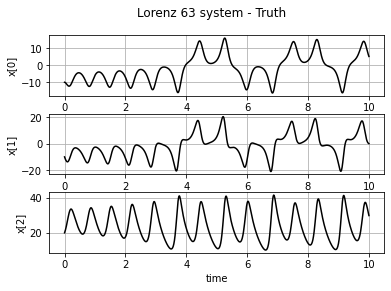

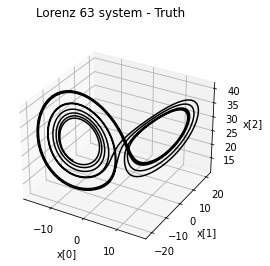

In [13]:
##
'''
 1. The Nature Run
 Let us perform a 'free' run of the model, which we will consider the truth
 The initial conditions
'''
model = 'L63'
x0 = [-10,-10,20] # true initial conditions
Nx = np.size(x0) # number of state variables
tmax = 10 # The final time of the nature run simulation
''' Computing the nature run '''
print('***generating nature run, wait for integration***')
paramtrue = [10.0, 8/3.0, 28.0] # true parameters
t,xt = lorenz63(x0,tmax,paramtrue)
plotL63(t,xt)
x0guess = [-11,-12,15]# A guess to start from in our assimilation experiments
#plt.savefig("image.png")

***generating observations


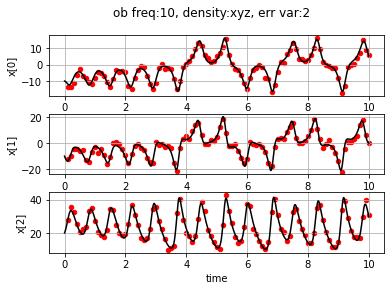

In [3]:
# %%
'''
 2. The observations
 Decide what variables to observe
'''
obsgrid = 'xyz' # options are 'x','y','z','xy','xz','yz','xyz'
period_obs =  10 # number of time steps between observtaions
var_obs = 2 # error variance of the observations

exp_title = 'ob freq:'+str(period_obs)+', density:'+str(obsgrid)+', err var:'+str(var_obs)

''' Generating the observations*** '''
print('***generating observations')
seed=123
H,observed_vars = createH(obsgrid,model)
tobs,y,R = gen_obs(t,xt,period_obs,H,var_obs,seed)
plotL63obs(t,xt,tobs,y,observed_vars,exp_title)

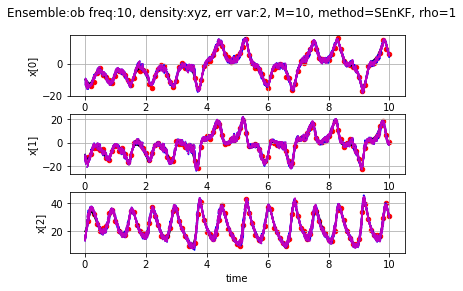

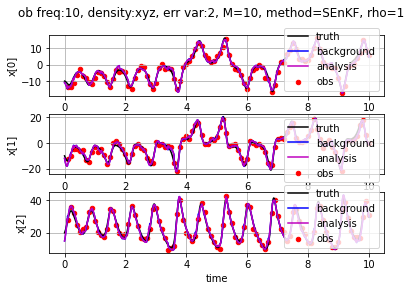

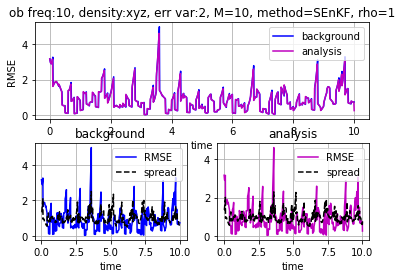

In [10]:
#%%
'''
 3. Data assimilation using KFs   
''' 
rho=1 # inflation factor
M = 10 # ensemble size
met = 'SEnKF' # method 'ETKF' or 'SEnKF'
exp_title_M=('ob freq:'+str(period_obs)+', density:'+str(obsgrid)+
             ', err var:'+str(var_obs)+', M='+str(M)+', method='+str(met)+', rho='+str(rho))
#print('***performing assimilation with '+ met +' ***')
Xb,xb,Xa,xa = kfs_lor63(x0guess,t,tobs,y,H,R,rho,M,met)
plotL63DA_kf(t,xt,tobs,y,observed_vars,Xb,xb,Xa,xa,exp_title_M)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(exp_title_M,t,rmseb,rmsea,spreadb,spreada)

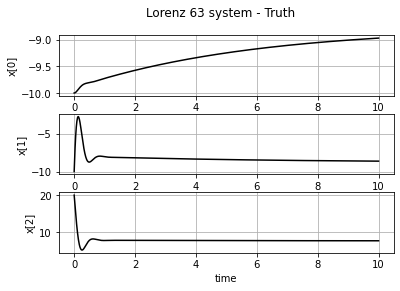

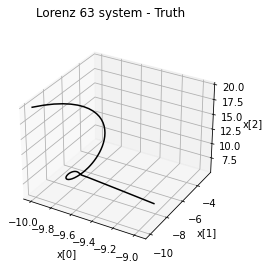

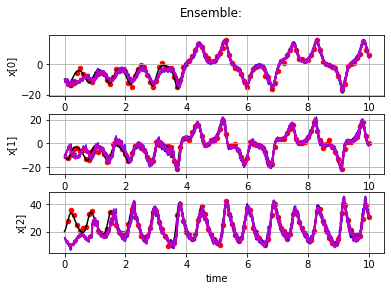

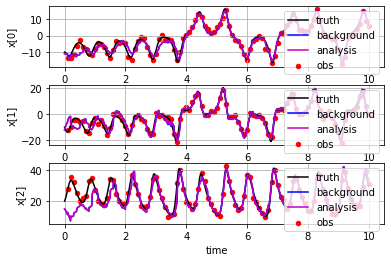

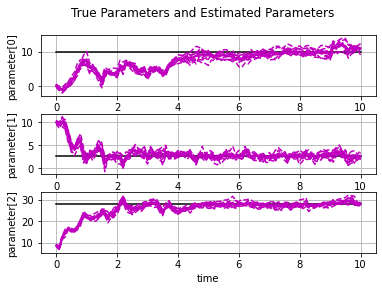

In [12]:
#%%
'''
 4 Parameter estimation using KF
'''
est_param = 1 # switch to estimate the model parameters as well as the state
if est_param:  
 rho=0.01 # inflation factor
 M = 10 # ensemble size
 met = 'SEnKF' # method 'ETKF' or 'SEnKF'  
 #print('***performing assimilation with '+ met +' ***')
 #parambad = [65.0,3.0,29.0]; 
 #parambad = [5.0,20.0,3];
 parambad = [0.100,10,8.7];
 #parambad = [0, 6.0, 0]

 Nparam = np.size(parambad)
 t,xbad = lorenz63(x0,tmax,parambad)
 plotL63(t,xbad)

 alpha=0.5
 Xb,xb,Xa,xa,Para,para = kfs_lor63_pe(x0guess,parambad,t,tobs,y,H,R,rho,alpha,M,met)
 plotL63DA_kf(t,xt,tobs,y,observed_vars,Xb,xb,Xa,xa,'')
 paramt_time = np.ones((len(tobs),1))*paramtrue
 plotpar(Nparam,tobs,paramt_time,Para,para)
 plt.show()